## X-ray generation and interaction with matter

This notebook is shared under the MIT-license. Copyright (C) 2023, B. Zeller-Plumhoff

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

This exercise is meant to help you practise writing markdown in Jupyter notebooks and doing simple computations. We begin by loading the libraries you will require lateron for your calculations.

In [3]:
# import required libraries
import matplotlib.pyplot as plt
import numpy as np

### Exercise 1

Briefly explain the working principle and the importance of the following components of a synchrotron: 
- RF cavities
- dipole bending magnets
- insertion devices

#### Solution

__RF cavities__ are the so-called radiofrequency cavities. An electromagnetic field is oscillating within the cavity, which is a metallic chamber. The oscillation is tuned to the speed of the charged particles (electrons or positrons) and the fields are switched to accelerate the particle. The RF cavities are an important component of the synchrotron, as they are used within the linear accelerator to accelerate the particles to an energy of about 0.1GeV. Some RF cavities are also included within the straight sections of the booster synchrotron to further accelerate the particles to 3-6 GeV and sometimes within the storage ring to keep the charged particles at the required energy.

__Dipole bending magnets__ are used to steer the charged particles within the booster synchrotron and the storage ring and keep it on its circular trajectory. The magnetic field is increased with the increasing energy of the charged particles to allow for this steering. In older generation synchrotrons dipole bending magnets are also used to generate X-rays, which are a by-product of the change in direction of the particles.

__Insertion devices__ are placed into the straight sections of the storage ring. They are magnetic arrays that cause the particle beam to wiggle or undulate, which generates X-ray radiation. The radiation generated in insertion devices is significantly more brilliant than that from bending magnets, as the stacking of several magnetic arrays and the tuning of the magnetic field allows for the positive interference of the photons, leading to an increased intensity. In wigglers, only the stacking takes effect and the intensity $I$ corresponding to a bending magnet would be increased to $N\cdot I$ in a wiggler with $N$ magnets. In an undulator, the positive interference leads to an intensity of $N^2\cdot I$.

### Exercise 2

You are given the following attenuation data of four different elements. Identify the elements and justify your choice.
<div>
<img src="attachment:att_coeff.png" width="800"/>
</div>
Hint: Use the periodic table provided [here](https://xrayabsorption.org/xraytable/)
Note: The copyright for the figures lies with J. H. Hubbell and S. M. Seltzer, Radiation Physics Division, PML, NIST, © 1989, 1990, 1996 copyright by the U.S. Secretary of Commerce on behalf of the United States of America. All rights reserved. NIST reserves the right to charge for these data in the future.

#### Solution
The figure shows the attenuation coefficients over photon energy of magnesium (a), neodymium (b), silver (c) and gold (d). The elements can be identified due to the steps in the attenuation coefficient arising from the increased attenuation by the activation of a lower electron shell. Since the resolution of the graphs is quite low any element within the correct range would be acceptable. The graphs shown were taken from [https://physics.nist.gov/PhysRefData/XrayMassCoef/tab3.html ]. For magnesium, the K-edge is at 1.303 keV. For neodymium, the K edge is at 43.569 keV, and three L-edges would be visible at 7.126, 6.722 and 6.208 keV. The M-edge of Nd at 0.98 keV is barely visible. For silver, the edge position are 26.711 keV for the K-edge, and 3.806, 3.524 and 3.351 keV for the L-edges. Finally, the K-edge of gold is at 80.725 keV, the L-edges at 14.353, 13.734, 11.919 keV and the M-edge at 2.206 keV.

### Exercise 3

The Bremsstrahlungsspectrum of an X-ray source can be approximated by Kramer's law, which relates the photon count $I$ to the wavelength $\lambda$ emitted over the wavelength interval $d\lambda$ by $$I(\lambda)d\lambda=K\left(\frac{\lambda}{\lambda_{min}}-1\right)\frac{1}{\lambda^2}d\lambda \, .$$ $K$ is proportional to the atomic number of the metal target. Please calculate and draw/plot the spectrum for a rhodium target with an electron beam energy of $E=60$ keV. Indicate clearly how you determined $\lambda_{min}$. You may choose an interval of $d\lambda$=5 pm for your calculation, with a maximum of 500 pm. Please comment on what may be missing from the spectrum calculated by the Kramer's law and where.

#### Solution

We set the following parameters: $K$=45 is the atomic number of rhodium, and $\lambda_{min}=\frac{hc}{E_{max}}$ with $hc\approx 1239.8$ eV nm and $E_{max}=60$ keV.

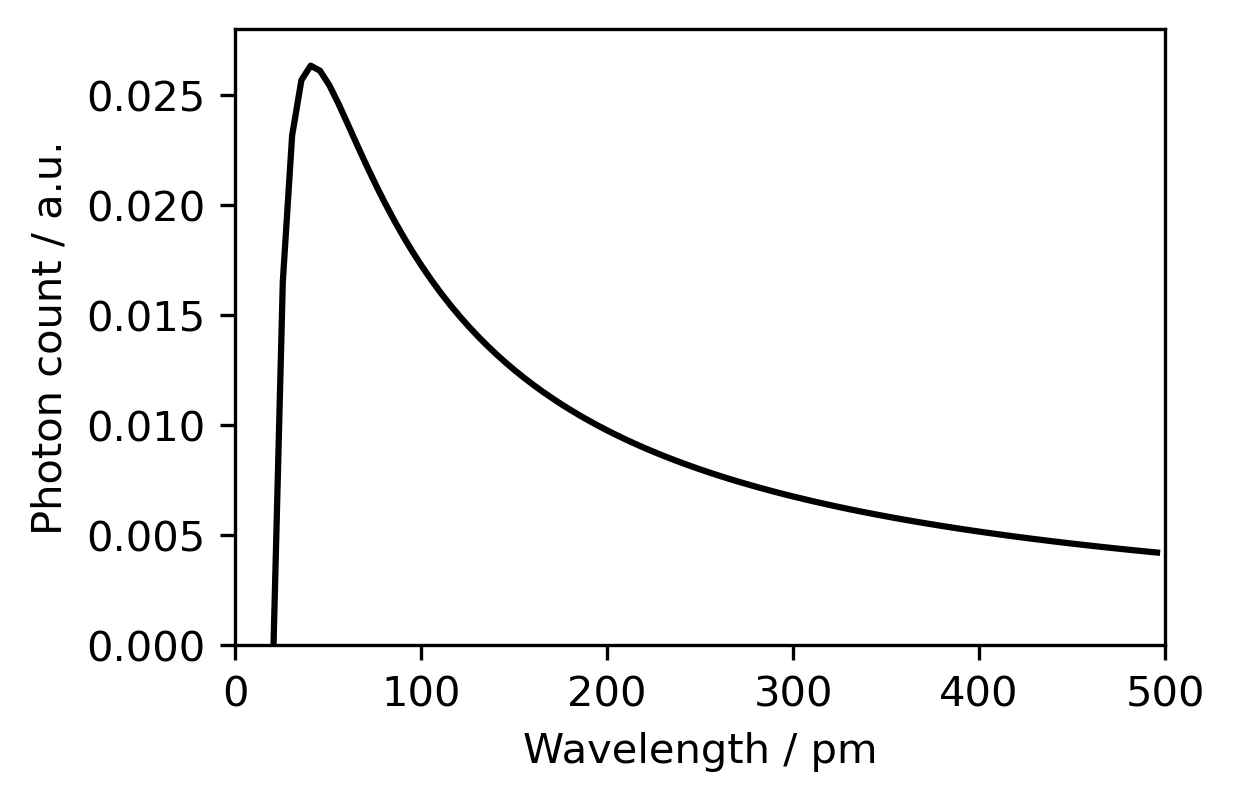

In [3]:
# set plot parameters (dpi and plot size)
my_dpi=300
plt.figure(figsize=(1200/my_dpi,800/my_dpi), dpi=my_dpi)

# set parameters and evaluate Kramer's law
# lambda min as determined from lambda_min=hc/E_max
lmin=1239.8/60; 
# atomic number of Rhodium
K=45; 
# vector of lambda
l=np.arange(lmin,500,5); 
# photon count
I=K*(l/lmin-np.ones(np.shape(l)))/(l**2); 

# plot Bremsstrahlungsspectrum
plt.plot(l,I,c='black')
plt.ylabel('Photon count / a.u.')
plt.xlabel('Wavelength / pm')
plt.ylim([0,0.028])
plt.xlim([0,500])
plt.tight_layout
plt.savefig('STMC_Exercise1.png', bbox_inches="tight")
plt.show()

Clearly, Kramer's law does not include the characteristic lines within the Bremsstrahlungsspectrum that are generated due to the characteristic X-rays. For rhodium, these are at 20.22 keV and 22.72 keV, which would equate to a wavelength of 61.3 pm and 54.6 pm.

### Exercise 4

Calculate the linear attenuation coefficient $\mu$ [cm$^{-1}$] for the interaction of monochromatic X-rays at an energy of 10 keV with iron. The coherent scattering cross-section is given as 111.4 barns/atom, the incoherent scattering cross-section as 7.921 barns/atom and the photoelectric absorption as 15710 barns/atom. 1 barn equals 10$^{-28}$ m$^2$. Present your calculation and all used parameter values clearly.

#### Solution

The total scattering cross-section $\sigma_{tot}$ is given as $\sigma_{tot}=\sigma_{coh}+\sigma_{incoh}+\sigma_{photo}$, thus	

In [15]:
tot_scat=np.round(111.4+7.921+15710,1)
print('The total scattering cross-section is',tot_scat,'barns/atom.')

The total scattering cross-section is 15829.3 barns/atom.


Given the fact that 1 barn equals 10$^{-28}$ m$^2$, $\sigma_{tot}=15829.3\cdot10^{-28}$ m$^2$/atom. The mass attenuation coefficient $\mu$ is related to $\sigma_{tot}$ as $\mu/\rho=\sigma_{tot}/(uA)$, with $u=1.66\cdot10^{-24}$g and for iron $A=55.847$, thus

In [14]:
mass_att=np.round(tot_scat*10**(-28)/(55.847*1.66*10**(-24)),4)
print('The mass attenuation coefficient is',mass_att,'m^2/g.')

The mass attenuation coefficient is 0.0171 m^2/g.


We can further compute the linear attenuation coefficient using $\rho=7.874$ g/cm$^3$ to be $\mu=$

In [17]:
lin_att_coeff=np.round(mass_att*7.874*10**4,2)
print('The linear attenuation coefficient is',lin_att_coeff,'cm^(-1).')

The linear attenuation coefficient is 1346.45 cm^(-1).
